In [38]:
import pyupbit

In [39]:
# BTC 최근 200시간의 data load
df = pyupbit.get_ohlcv("KRW-BTC", count=10000)
df


,open,high,low,close,volume,value
2017-09-25 09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
2017-09-26 09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2017-09-27 09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
2017-09-28 09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
2017-09-29 09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08
...,...,...,...,...,...,...
2022-02-28 09:00:00,46363000.0,53089000.0,46086000.0,52332000.0,10346.179385,5.103455e+11
2022-03-01 09:00:00,52332000.0,54777000.0,52004000.0,53790000.0,10899.506809,5.800174e+11
2022-03-02 09:00:00,53789000.0,54829000.0,52789000.0,53359000.0,7651.796389,4.100425e+11
2022-03-03 09:00:00,53359000.0,53710000.0,51219000.0,51842000.0,5670.325737,2.984037e+11


In [40]:
# 시간(ds)과 종가(y)값만 남긴다
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2017-09-25 09:00:00,4322000.0
1,2017-09-26 09:00:00,4321000.0
2,2017-09-27 09:00:00,4657000.0
3,2017-09-28 09:00:00,4586000.0
4,2017-09-29 09:00:00,4657000.0
...,...,...
1617,2022-02-28 09:00:00,52332000.0
1618,2022-03-01 09:00:00,53790000.0
1619,2022-03-02 09:00:00,53359000.0
1620,2022-03-03 09:00:00,51842000.0


In [41]:
# prophet 불러 옴
from fbprophet import Prophet

In [42]:
# Training
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/r320ws/anaconda3/envs/CoinATS/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -29.9442
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3070.81    0.00569974       281.658      0.8936      0.8936      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3122.31    0.00722661       201.481      0.7574      0.7574      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       3124.34   0.000175487       77.9064   1.858e-06       0.001      303  LS failed, Hessian reset 
     264       3128.64    0.00332973       484.658   2.311e-05       0.001      401  LS failed, Hessian reset 
     299       3131.77     0.0122791        387.53           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3140.81     0.0113911       219.875           1           1      568   
    Iter      log pro

In [43]:
# 24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

/home/r320ws/anaconda3/envs/CoinATS/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/r320ws/anaconda3/envs/CoinATS/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


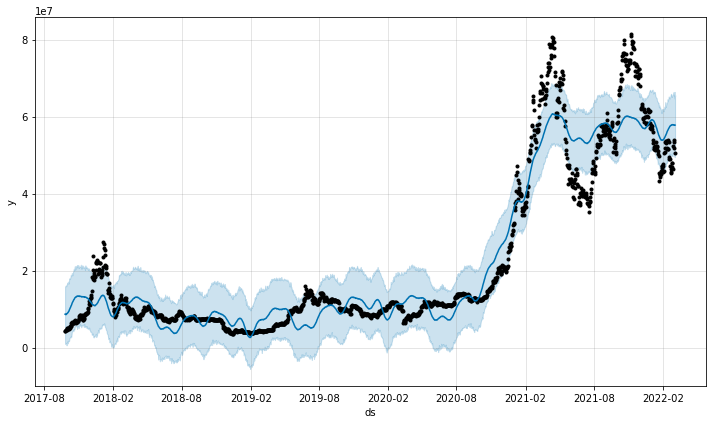

In [44]:
# Graph1
fig1 = model.plot(forecast)

/home/r320ws/anaconda3/envs/CoinATS/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/r320ws/anaconda3/envs/CoinATS/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


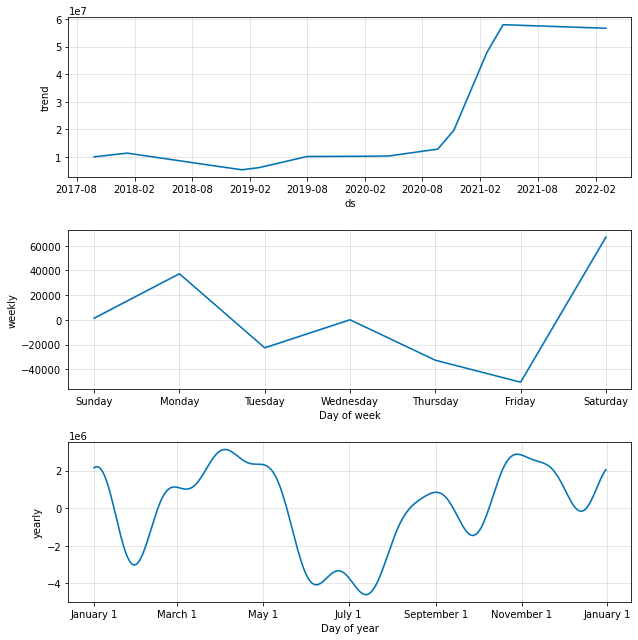

In [45]:
fig2 = model.plot_components(forecast)

In [46]:
# 매수 시점 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

50651000.0

In [47]:
# 종가의 가격을 구함

# 현재 시간이 자전 이전일 때
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

# 현재 시간이 자정 이후일 때
if len(closeDf) == 0:
    closeDf = forecate[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

closeValue = closeDf['yhat'].values[0]


In [48]:
closeValue

57794127.35248979